# Beispiel: Würfelwurf

Ein Würfel hat sechs Seiten mit je sechs verschiedenen Augenzahlen.
Es soll untersucht werden, mit welcher Wahrscheinlichkeit beim Würfeln die Zahl 6 gewürfelt wird.

#### 1. Mit welcher Vorannahme geht ihr in das Experiment hinein? Stellt die A-priori-Wahrscheinlichkeit auf und begründet diese kurz.
--> Aufgrund der sechs Seiten des Würfels und der logischen Schlussfolgerung, dass pro Wurf nur eine der sechs Zahlen gewürfelt werden kann, liegt die Wahrscheinlichkeit bei 1/6. Die Zahl sechs wird also mit einer Wahrscheinlichkeit von 1/6 (1,66666666) gewürfelt werden. Die A-priori-Wahrscheinlichkeit (Prior) sei somit eine eng gestreute Normalverteilung um den Mittelwert p = 1/6.

#### 2. Generiert nun die Daten für den Würfelwurf. Dabei soll eure A-priori-Wahrscheinlichkeit in der Variable p gespeichert und es soll zu Anfang 10x gewürfelt werden.

#### 3. Auf Grundlage der generierten Daten implementiert nun das passende PyMC3 Modell. Visualisiert anschließend die A-posteriori-Wahrscheinlichkeit. Was ist der Mittelwert und der Wert für die Standardabweichung?

In [9]:
#Importe

import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az

In [10]:
#Daten des Würfelwurfs generieren
trials = 10 # Aufgabe 2.: 10 Würfel
p = 1/6 # Aufgabe 2.: 1/6 Wahrscheinlichkeit

In [11]:
tosses = stats.bernoulli.rvs(p=p_six, size=trials)
tosses

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### PyMC3 Modell implementieren

In [12]:
with pm.Model() as model:
    
    #Prior defninieren
    p_six = pm.Beta('p_six', 1, 1)
    
    #Likelihood definieren
    data = pm.Bernoulli('data', p=p_six, observed=tosses)
    
    #Stichprobenziehung
    trace = pm.sample(1000, random_seed=123, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_six]


/Users/madlinma/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.


### Daten visualisieren

In [13]:
az.summary(trace, kind=('stats'))

,mean,sd,hdi_3%,hdi_97%
p_six,0.165,0.106,0.006,0.347


In [14]:
# Der Mittelwert liegt bei 0.165, also 1,66%
# Die Standardabweichung beträgt 0.106, also 1,06%

array([[<AxesSubplot:title={'center':'p_six'}>,
        <AxesSubplot:title={'center':'p_six'}>]], dtype=object)

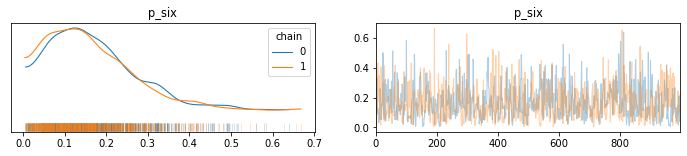

In [15]:
az.plot_trace(trace, rug=True, rug_kwargs={"alpha": .2}, compact=False, legend=True)

<AxesSubplot:title={'center':'p_six'}>

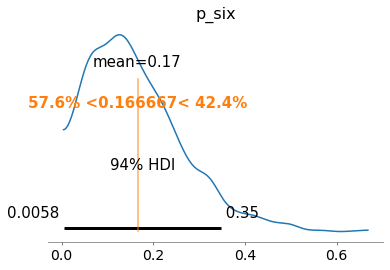

In [16]:
az.plot_posterior(trace, ref_val=1/6)